# **RBOT 240 - Week 5 Exercises**

Complete 3 of the following exercises.

---

# <font color="blue">My selected three questions are:</font>
<font color="blue">- <b>Exercise E2</b></font>

<font color="blue">- <b>Exercise D1</b></font>

<font color="blue">- <b>Exercise P3</b></font>

---

## Problem Exercises

**(Exercise E1)**  Show that the sum of any two kernels, $K(x_i, x_j) = K1(x_i, x_j) + K2(x_i, x_j)$ is a valid kernel

**<font color="blue">(Exercise E2)** Show that the elementwise product of any two kernels K1 and K2, $K(x_i, x_j) = K1(x_i, x_j)K2(x_i, x_j)$, is a valid kernel</font>

<font color="green"><u><b>Answer</b></u></font>

Assume that $K1(x_i, x_j) and K2(x_i, x_j)$ is a valid kernel, we can prove their product is also a valid kernel by utilizing **Mercer's theorem**.

Based on **Mercer's condition**, in case of the discrete:[1]

$
\begin{align}
\mathbf{(g, Kg)} = g^T \cdot Kg = \sum_{i=1}^{N}\sum_{j=1}^{N} g_{i}K_{ij}g_{j} \geq 0 
\end{align}
$

Since $K1, K2$ are valid kernels, we know (via Mercer) that they must admit an inner product representation. Let a denote the feature vector of $K1$ and b denote the same for $K2$.

$
\begin{align}
\mathbf{k_{1}(x,y)} = a(x)^Ta(y), \qquad a(z) = [a_{1}(z),a_{2}(z),...a_{M}(z)]
\end{align}
$
$
\begin{align}
\mathbf{k_{2}(x,y)} = b(x)^Tb(y), \qquad b(z) = [b_{1}(z),b_{2}(z),...b_{N}(z)]
\end{align}
$

So $a$ is a function that produces an $M$-dimension vector, and $b$ produces an $N$-dimension vector.

We just write the product in terms of $a$ and $b$, and regrouping:

\begin{equation}
\begin{aligned}
\mathbf{K(x,y)} &= K1(x,y)K2(x,y) \\
  & = \left(\sum_{m=1}^{M}a_{m}(x)a_{m}y\right) \left(\sum_{n=1}^{N}b_{n}(x)b_{n}y\right) \\
  & = \sum_{m=1}^{M}\sum_{n=1}^{N}[a_{m}(x)b_{n}(x)][a_{m}(y)b_{n}(y)] \\
  & = \sum_{m=1}^{M}\sum_{n=1}^{N}c_{mn}(x)c{mn}(y) \\
  & = c(x)^Tc(y)
\end{aligned}
\end{equation}

$
\begin{align}
\text{Where c(z) is an M $\cdot$ N dimensional vector such that $c_{mn}(z) = a_{m}(z)b_{n}(z)$}
\end{align}
$

Since we can write $K(x,y)$ as an inner product using the feature map $c$, we know $K$ is a valid kernel. 

[1] https://en.wikipedia.org/wiki/Mercer%27s_theorem


## Discussion Exercises

**<font color="blue">(Exercise D1)** What is the "kernel trick"?  Describe it in depth.</font>

<font color="green"><u><b>Answer</b></u></font>

In a simple word, **kernel** is essentially a mapping function - one that transforms a given space into some other (usually very high dimensional) space. Please look at the below image of why **kernel** is very useful for the data that is not linearly seperable.

<image src="https://miro.medium.com/max/700/1*mCwnu5kXot6buL7jeIafqQ.png" />

<i> image sorce: https://medium.com/@zxr.nju/what-is-the-kernel-trick-why-is-it-important-98a98db0961d </i>

If we find a way to map the data from 2-dimensional space to 3-dimensional space, we will be able to find a decision surface that clearly divides between different classes.

**Kernal tricks** allows us to operate in the original feature space without computing the coordinates of the data in a higher dimensional space.

For example,

<image src="https://miro.medium.com/max/404/1*77NyCspYpY14MRuh3LWX0A.png" />

x and y are two data points in 3 dimensions. Assume that we need to map x and y to 9-dimensional space. We need to do the following calculations to get the final result, which is just a scalar. The computational complexity, in this case, is $O(n²)$.

<image src="https://miro.medium.com/max/700/1*pF6fewWChhI7dBSOOy6I2w.png" />
<image src="https://miro.medium.com/max/520/1*wmJQ6ZMDDSRcGLsszGpO7A.png" />

The **trick** is to staying in **2-D**. Kernels give a way to compute dot products in 2-D, by replacing inner product with its square, knowing that
it will work because what we are doing is equivalent to working
with actual inner products in the 3-D space. The computational complexity, in this case, is $O(n)$.[1]

<image src="https://miro.medium.com/max/600/1*YqrzGMB2trEgHdJkFEk9yg.png" />

[1] https://svivek.com/teaching/lectures/slides/svm/kernels.pdf

**(Exercise D2)** Compare Gaussian process regression to the parameterezed regression you did last week.  What are the advantages and disadvantages?

## Programming Exercises

### Gaussian Kernel Regression

For this week's programming exercises, we'll look at the implementation of Gaussian process regression. 

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

## **(Exercise P1)** Kernel Functions

Implement the linear, polynomial, an squared exponential kernel functions below.

(hint: use the pytorch *cdist* function to get pairwise differences)


### Linear kernel:
$K(X,Y) = X Y^T$

In [ ]:
def linear_kernel(X, Y):
  
    ################################################
    ####### Place your implementation here #########
    ################################################
    return X * Y.T

### Polynomial kernel:
$K_d(X,Y) = (X Y^T + 1)^d$

In [ ]:
def polynomial_kernel(X, Y, d=3):
  
    ################################################
    ####### Place your implementation here #########
    ################################################
    return ((X * Y.T) + 1) ** d

### Radial Basis Function (a.k.a Gaussian) kernel:
$K(X, Y) = \text{exp}(\gamma ||X - Y|| ^ 2)$

In [346]:
def squared_exponential_kernel(X, Y):
  
    ################################################
    ####### Place your implementation here #########
    ################################################
    gamma = -1
    pair = torch.cartesian_prod(torch.squeeze(X), torch.squeeze(Y))
    # print(pair.size())
    norm = torch.linalg.norm(pair, dim=1)
    # print(norm.size())
    sqrt_norm = norm**2
    # print(sqrt_norm.size())
    exp = torch.exp(gamma * sqrt_norm)
    # print(exp.size())
    return exp.reshape((50,50))

torch.Size([50, 50])
torch.Size([50, 50])
torch.Size([50, 1])
torch.Size([50, 50])
torch.Size([50, 50])
torch.Size([50, 50])


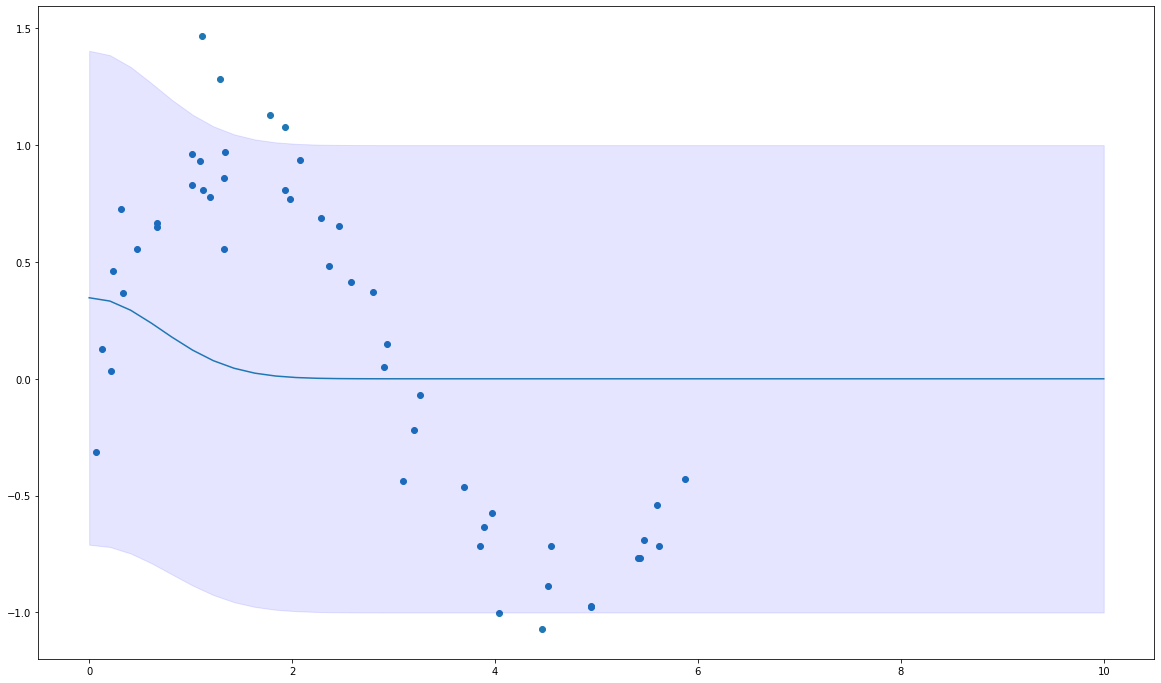

In [347]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import torch
import math

n_samples = 50
n_train   = 50
x_max = 10
sigma_n = 1

X_train = 6 * torch.rand(n_train,1)
Y_train = np.sin(X_train) + .2*torch.randn(X_train.shape)

X_test = torch.linspace(0,x_max,n_samples).unsqueeze(1).float()
Y_test = np.sin(X_test)

kernel = squared_exponential_kernel

K_st = kernel(X_test,  X_train)
K_tt = kernel(X_train, X_train)
K_ss = kernel(X_test,  X_test)
K_ts = kernel(X_train, X_test)

a = (sigma_n**2)*torch.eye(n_samples)
a_inverse = torch.inverse(K_tt + a)
print(a_inverse.size())
b = K_st @ a_inverse
print(b.size())
mean = K_st @ a_inverse @ Y_test
print(mean.size())

c = K_ss + (sigma_n**2)*torch.eye(n_samples)
print(c.size())
d = K_st @ a_inverse @ K_ts
print(d.size())
cov = c - d
print(cov.size())

plt.figure(figsize=(20, 12))
plt.scatter(X_train, Y_train)
plt.plot(X_test, mean)
std = torch.sqrt(torch.diag(cov)).unsqueeze(1)
plt.fill_between(X_test.flatten(), (mean-std).flatten(), (mean+std).flatten(), color=(0,0,1,.1))
plt.show()

## **(Exercise P2)** Gaussian process regression

Implement the Gaussian process regression of $\mu$ an $\Sigma$ [from the reading](http://cs229.stanford.edu/summer2020/gaussian_processes.pdf#page=10).

$\mu^* = K(X_*,X)(K(X,X) + \sigma^2 I)^{-1} y$

$\Sigma^* = K(X_*,X_*) + \sigma^2 I - K(X_*,X)(K(X,X) + \sigma^2 I)^{-1}K(X,X_*)$

In [305]:
def kernel_function(x, y, sigma_f=1, l=1):
    """Define squared exponential kernel function."""
    # kernel = sigma_f * np.exp(- (np.linalg.norm(x - y)**2) / (2 * l**2))
    kernel = np.exp(-(np.linalg.norm(x - y)**2))
    return kernel

(50, 50)
(50, 1)
(50, 50)
(50, 50)
(50, 50)


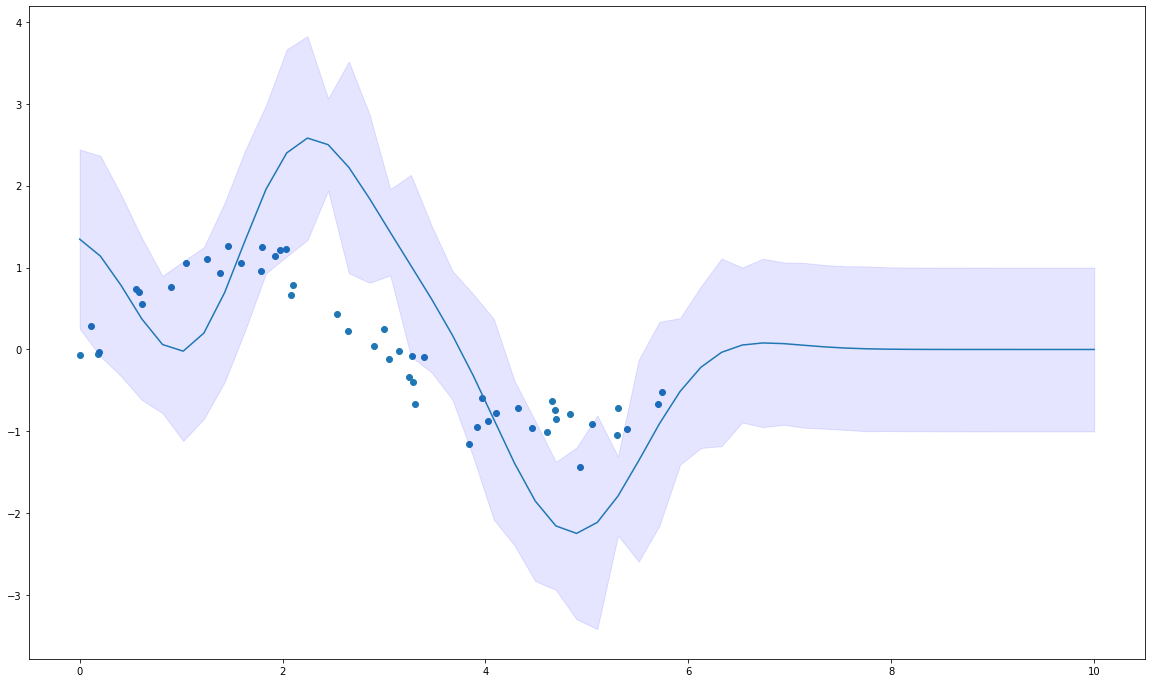

In [348]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import torch
import math

n_samples = 50
n_train   = 50
x_max = 10

X_train = 6 * torch.rand(n_train,1)
Y_train = np.sin(X_train) + .2*torch.randn(X_train.shape)

X_test = torch.linspace(0,x_max,n_samples).unsqueeze(1).float()
Y_test = np.sin(X_test)

X_train = X_train.numpy()
Y_train = Y_train.numpy()
X_test = X_test.numpy()
Y_test = Y_test.numpy()

sigma_n = 1

kernel = kernel_function

# K_st = kernel(X_test,  X_train)
K_st = [kernel_function(i, j) for (i, j) in itertools.product(X_test, X_train)]
K_st = np.array(K_st).reshape(n_samples, n_samples)
# K_tt = kernel(X_train, X_train)
K_tt = [kernel_function(i, j) for (i, j) in itertools.product(X_train, X_train)]
K_tt = np.array(K_st).reshape(n_samples, n_samples)
# K_ss = kernel(X_test,  X_test)
K_ss = [kernel_function(i, j) for (i, j) in itertools.product(X_test, X_test)]
K_ss = np.array(K_st).reshape(n_samples, n_samples)
# K_ts = kernel(X_train, X_test)
K_ts = [kernel_function(i, j) for (i, j) in itertools.product(X_train, X_test)]
K_ts = np.array(K_st).reshape(n_samples, n_samples)

################################################
####### Place your implementation here #########
################################################
# print(K_st.shape)
# print(K_tt.shape)
# print(K_ss.shape)
# print(K_ts.shape)

a = (sigma_n**2)*np.eye(n_samples)
a_inverse = np.linalg.inv(K_tt + a)
print(a_inverse.shape)
# b = K_st.T @ a_inverse
# print(b.shape)
mean = K_st @ a_inverse @ Y_test
# # # # # print(Y_test.size())
print(mean.shape)

c = K_ss + (sigma_n**2)*np.eye(n_samples)
print(c.shape)
d = K_st @ a_inverse @ K_ts
print(d.shape)
cov = c - d
print(cov.shape)

mean = torch.from_numpy(mean)
cov = torch.from_numpy(cov)

plt.figure(figsize=(20, 12))
plt.scatter(X_train, Y_train)
plt.plot(X_test, mean)

std = torch.sqrt(torch.diag(cov)).unsqueeze(1)
plt.fill_between(X_test.flatten(), (mean-std).flatten(), (mean+std).flatten(), color=(0,0,1,.1))
plt.show()

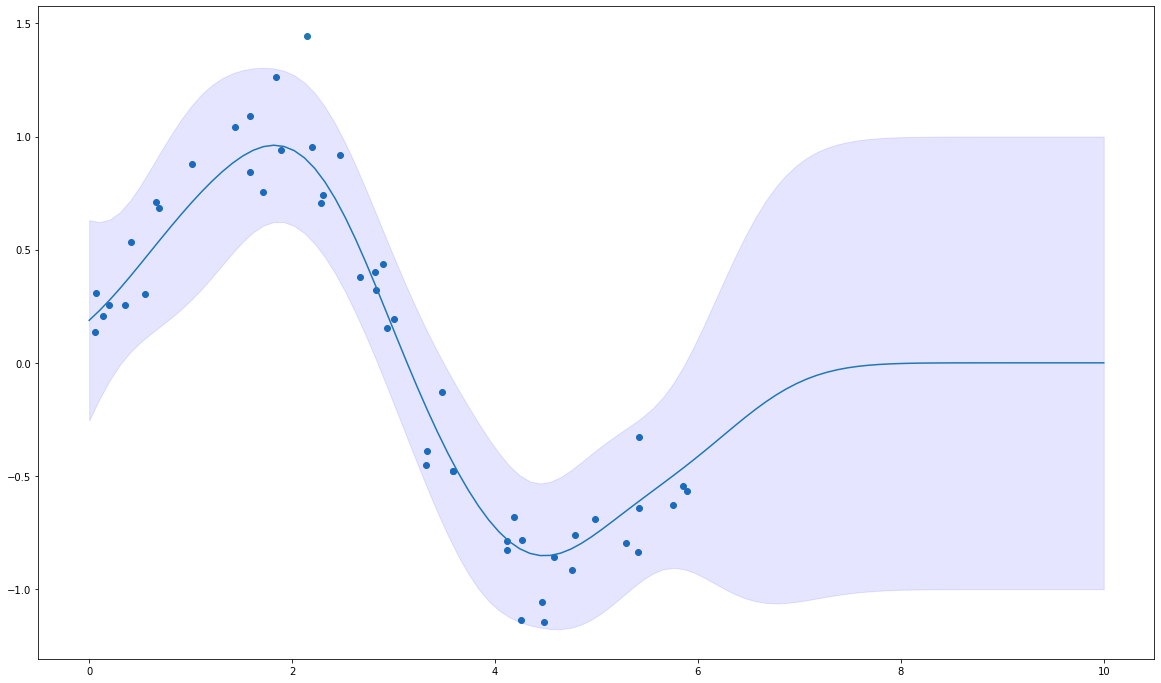

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math

n_samples = 100
n_train   = 50
x_max = 10

X_train = 6 * torch.rand(n_train,1)
Y_train = np.sin(X_train) + .2*torch.randn(X_train.shape)

X_test = torch.linspace(0,x_max,n_samples).unsqueeze(1).float()
Y_test = np.sin(X_test)

kernel = squared_exponential_kernel

K_st = kernel(X_test,  X_train)
K_tt = kernel(X_train, X_train)
K_ss = kernel(X_test,  X_test)
K_ts = kernel(X_train, X_test)

################################################
####### Place your implementation here #########
################################################

plt.figure(figsize=(20, 12))
plt.scatter(X_train, Y_train)
plt.plot(X_test, mean)
std = torch.sqrt(torch.diag(cov)).unsqueeze(1)
plt.fill_between(X_test.flatten(), (mean-std).flatten(), (mean+std).flatten(), color=(0,0,1,.1))
plt.show()

## <font color="blue">**(Exercise P3)** SciKit-Learn GaussianProcessRegressor</font>

Use the Scikit-Learn library to perform the regression from exercise 2

 ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#sklearn.gaussian_process.GaussianProcessRegressor))

 <font color="green"><u><b>Answer</b></u></font>

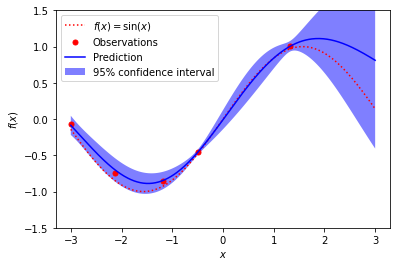

In [ ]:
################################################
####### Place your implementation here #########
################################################

# Import Library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Suppress warning message
import warnings
warnings.filterwarnings("ignore")

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)

num_samples = 5

# Define function to predict
def f(x):
    return np.sin(x)

# Generate X data (same with assignment 2)
X = -3 + 6*np.random.rand(num_samples)

# Observations and noise (same with assignment 2)
dy = .2*np.random.rand(num_samples)
y = (f(X) + dy).ravel()

# Make input at least two dimensions
X = np.atleast_2d(X).T

# Mesh the input space for evaluations of the real function, the prediction and its MSE
x = np.atleast_2d(np.linspace(-3, 3, 400)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, alpha=dy ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = \sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-1.5, 1.5)
plt.legend(loc='upper left')

plt.show()